<a href="https://colab.research.google.com/github/parvej8461/API-Scrapping/blob/main/GENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##install python SDK##

In [1]:
!pip install -q -U google-generativeai

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace(".", " *")
  return Markdown(textwrap.indent(text, '>', predicate = lambda _:True))




In [3]:
from google.colab import userdata

In [4]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)


##List Of Models##

In [5]:
for i in genai.list_models():
  if 'generateContent' in i.supported_generation_methods:
    print(i.name)



models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


#Generate text from inputs#

In [10]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

In [11]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash-latest',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

In [12]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 113 ms, sys: 12.8 ms, total: 126 ms
Wall time: 8.06 s


In [13]:
response.text

"The meaning of life is a question that has been pondered by philosophers, theologians, and everyday people for centuries. There is no one definitive answer, as the meaning of life is subjective and can vary greatly from person to person. \n\nHere are some common perspectives on the meaning of life:\n\n**Philosophical Perspectives:**\n\n* **Nihilism:**  Life has no inherent meaning or purpose.  \n* **Existentialism:**  Individuals are responsible for creating their own meaning.\n* **Absurdism:**  The universe is indifferent to human existence, and meaning is created through embracing the absurdity of life.\n* **Hedonism:**  The pursuit of pleasure is the ultimate goal in life.\n* **Utilitarianism:**  The goal is to maximize happiness and well-being for the greatest number of people.\n\n**Religious Perspectives:**\n\n* **Theism:**  Life has a divine purpose, and meaning is found in serving a higher power.\n* **Buddhism:**  The purpose of life is to end suffering and achieve enlightenmen

In [14]:
to_markdown(response.text)

>The meaning of life is a question that has been pondered by philosophers, theologians, and everyday people for centuries * There is no one definitive answer, as the meaning of life is subjective and can vary greatly from person to person * 
>
>Here are some common perspectives on the meaning of life:
>
>**Philosophical Perspectives:**
>
>* **Nihilism:**  Life has no inherent meaning or purpose *  
>* **Existentialism:**  Individuals are responsible for creating their own meaning *
>* **Absurdism:**  The universe is indifferent to human existence, and meaning is created through embracing the absurdity of life *
>* **Hedonism:**  The pursuit of pleasure is the ultimate goal in life *
>* **Utilitarianism:**  The goal is to maximize happiness and well-being for the greatest number of people *
>
>**Religious Perspectives:**
>
>* **Theism:**  Life has a divine purpose, and meaning is found in serving a higher power *
>* **Buddhism:**  The purpose of life is to end suffering and achieve enlightenment *
>* **Other religions:** Many religions offer their own interpretations of the meaning of life, often centered on spiritual growth and connection with a higher power *
>
>**Personal Perspectives:**
>
>* **Meaning through relationships:**  Finding purpose in love, family, and community *
>* **Meaning through achievement:**  Striving for goals and making a contribution to the world *
>* **Meaning through experience:**  Embracing life's journey and finding meaning in the everyday moments *
>* **Meaning through service:**  Making a difference in the lives of others *
>
>**Ultimately, the meaning of life is what you make it ***  It's a personal journey of discovery, and there's no right or wrong answer *  
>
>**Instead of searching for a singular meaning, perhaps it's more beneficial to consider:**
>
>* **What brings you joy and fulfillment?**
>* **What are your values and beliefs?**
>* **What legacy do you want to leave behind?**
>
>By exploring these questions, you can begin to define your own unique meaning of life * 


In [15]:
%%time
response = model.generate_content("What is the meaning of life?", stream =True)

CPU times: user 117 ms, sys: 7.63 ms, total: 124 ms
Wall time: 8.13 s


In [16]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The
________________________________________________________________________________
 meaning of life is a question that has been pondered by philosophers, theologians, and
________________________________________________________________________________
 individuals for centuries. There is no single, definitive answer, as the meaning of
________________________________________________________________________________
 life is a deeply personal and subjective experience.

**Philosophical Perspectives:**

* **Nihilism:**  Life has no inherent meaning or purpose.

________________________________________________________________________________
* **Existentialism:**  Individuals create their own meaning through their choices and actions.
* **Absurdism:**  Life is inherently meaningless,
________________________________________________________________________________
 but we can find meaning through embracing the absurdity of existence.
* **Hedonism:**  The pursuit of pleasure and happiness 

###GEnearte text from image###

In [18]:
/content/images.jpeg

NameError: name 'content' is not defined

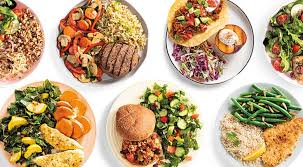

In [19]:
import PIL.Image

img = PIL.Image.open('/content/images.jpeg')
img

In [20]:
model = genai.GenerativeModel('gemini-pro-vision')


In [21]:
response = model.generate_content(img)

to_markdown(response.text)

> The dishes are all very healthy and nutritious * They are made with fresh, whole ingredients and are cooked in a healthy way * The dishes are also very flavorful and satisfying *

In [22]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

In [23]:
response = model.generate_content(img)

to_markdown(response.text)

>This image shows a variety of healthy and delicious meals * The meals include:
>
>* **Grilled chicken with sweet potato and greens**
>* **Burger with a side salad**
>* **Chicken with brown rice and green beans**
>* **Ground beef with vegetables and rice**
>* **Taco with a side of slaw and avocado**
>* **Salad with grilled chicken**
>* **Brown rice with vegetables**
>
>These meals look like they could be part of a healthy eating plan, with a focus on whole foods, lean protein, and vegetables *

In [26]:
response = model.generate_content(["write a short enagaging blog post based on the picture", img], stream =True)

In [28]:
response.resolve()

In [29]:
to_markdown(response.text)

>##  Tired of the Same Old Dinner Routine?
>
>Let's face it, cooking dinner every night can feel like a chore * You're tired, you're hungry, and the last thing you want to do is spend an hour in the kitchen * 
>
>But what if there was a way to enjoy delicious, healthy meals without the hassle? 
>
>**Enter meal delivery services!** 
>
>These services offer pre-portioned ingredients and easy-to-follow recipes that take the guesswork out of meal planning * No more scouring the grocery store for obscure ingredients or staring blankly at your pantry wondering what to make * 
>
>With meal delivery, you can choose from a variety of cuisines, dietary restrictions, and meal plans to fit your needs and preferences * From hearty burgers to fresh salads, the options are endless * 
>
>**Check out the picture above for some meal delivery inspiration!**
>
>Say goodbye to boring dinners and hello to exciting, flavorful meals you can enjoy without the stress *  
